In [3]:
!python -m pip install -q umap-learn


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
!python -m pip install -q matplotlib datashader bokeh holoviews scikit-image colorcet


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import matplotlib.font_manager
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer
# Preprocesado y modelado
import umap

In [5]:
USArrests = sm.datasets.get_rdataset("USArrests", "datasets")
datos = USArrests.data
datos.head(10)

,Murder,Assault,UrbanPop,Rape
rownames,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [6]:
X=datos.values
scaler = StandardScaler()
X_new=scaler.fit_transform(X)
print(X_new.shape)

(50, 4)


In [7]:
# Aplicar UMAP
#reducer = umap.UMAP() # Default
reducer = umap.UMAP(n_neighbors=15, n_components=2, metric='minkowski')

In [8]:
embedding = reducer.fit_transform(X_new)

In [9]:
tabla_final=pd.DataFrame(embedding,columns=['PC1','PC2'])
tabla_final['State']=datos.index
tabla_final.head()

,PC1,PC2,State
0,1.716659,11.202217,Alabama
1,0.441407,12.241187,Alaska
2,1.131853,12.635477,Arizona
3,3.350132,15.106732,Arkansas
4,0.844019,12.925750,California


Text(0, 0.5, 'PC2')

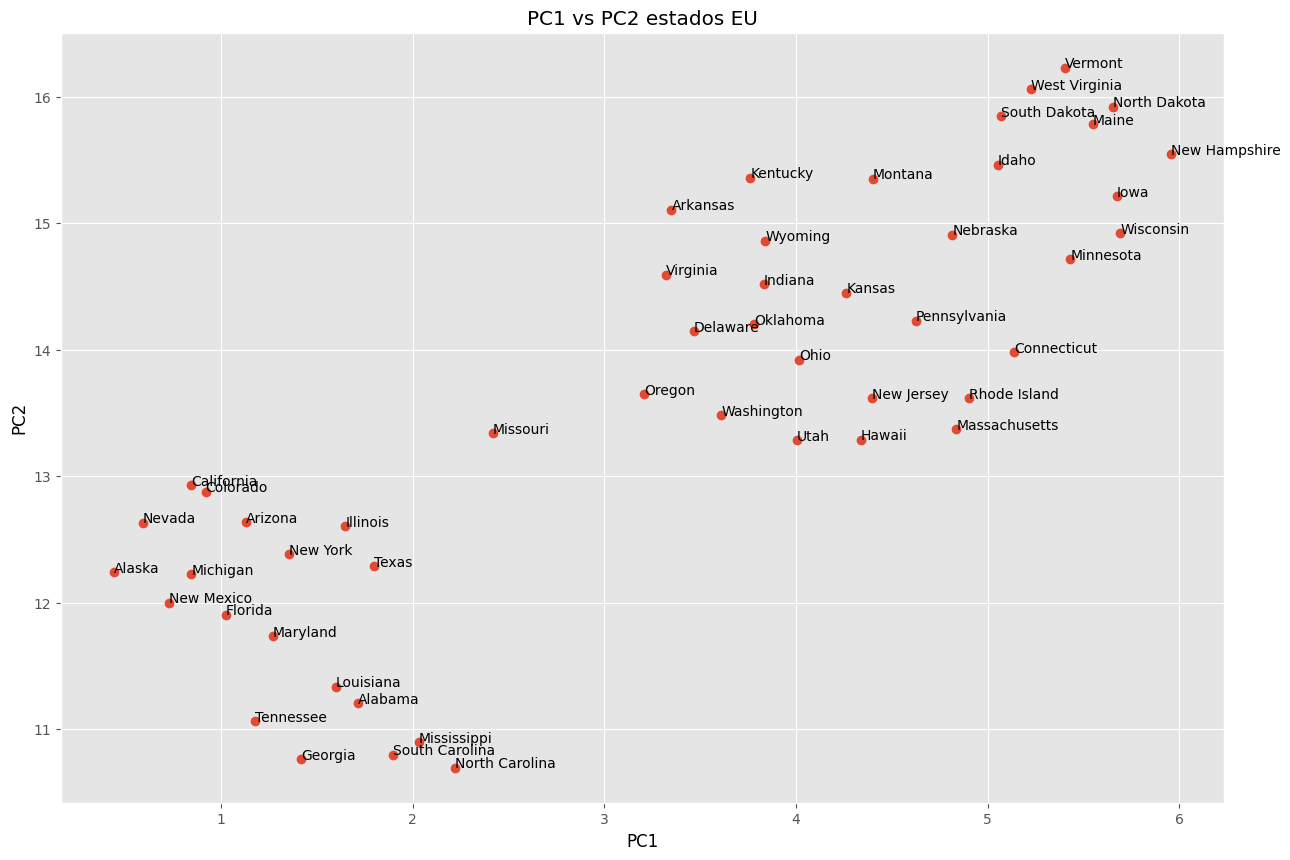

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))

ax = tabla_final.set_index('PC1')['PC2'].plot(style='o')
def label_point(x, y, val, ax):
  a = pd.concat({'x': x, 'y': y, 'State': val}, axis=1)
  for i, point in a.iterrows():
    ax.text(point['x'], point['y'], str(point['State']))

label_point(tabla_final.PC1, tabla_final.PC2, tabla_final.State, ax)
#plt.axvline(x=0,color='black')
#plt.axhline(y=0,color='black')
plt.title('PC1 vs PC2 estados EU')
plt.xlabel('PC1',color='k')
plt.ylabel('PC2',color='black')

# Desafio

El conjunto de datos original trata de predecir la categoría de un producto de comercio electrónico dado varios atributos sobre el anuncio. Aunque las características están anonimizadas, tienen propiedades relacionadas con características del mundo real

La idea sería poder replicar la metodología UMAP con el fin de visualizar mejor las estructuras de relaciones entre los datos

## Model

In [13]:
david_df = pd.read_csv("./train.csv")
X, y = david_df.drop("target", axis=1), david_df[["target"]].values.flatten()
print(X.shape)
X.head().sample(30, axis=1)

(200000, 76)


,feature_70,feature_74,feature_29,feature_49,feature_66,feature_14,feature_58,feature_23,feature_59,feature_48,...,feature_16,feature_71,feature_25,feature_18,feature_73,feature_46,feature_50,feature_72,feature_55,feature_60
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,3,0,0,3,2,0,0
1,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
2,1,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,7,0,3,3
3,2,0,1,0,0,0,2,0,0,0,...,0,0,3,22,3,0,0,4,1,2
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [14]:
np.unique(y)

array(['Class_1', 'Class_2', 'Class_3', 'Class_4', 'Class_5', 'Class_6',
       'Class_7', 'Class_8', 'Class_9'], dtype=object)

In [26]:
y

array(['Class_6', 'Class_6', 'Class_2', ..., 'Class_8', 'Class_7',
       'Class_8'], dtype=object)

In [17]:
pipe = make_pipeline(PowerTransformer())
X = pipe.fit_transform(X.copy())
y_t = pd.factorize(y)[0]

In [18]:
y_t

array([0, 0, 1, ..., 2, 6, 2], dtype=int64)

In [ ]:
umap.UMAP().fit?

In [19]:
umap_david = umap.UMAP().fit(X, y_t)

## Plots

<Axes: >

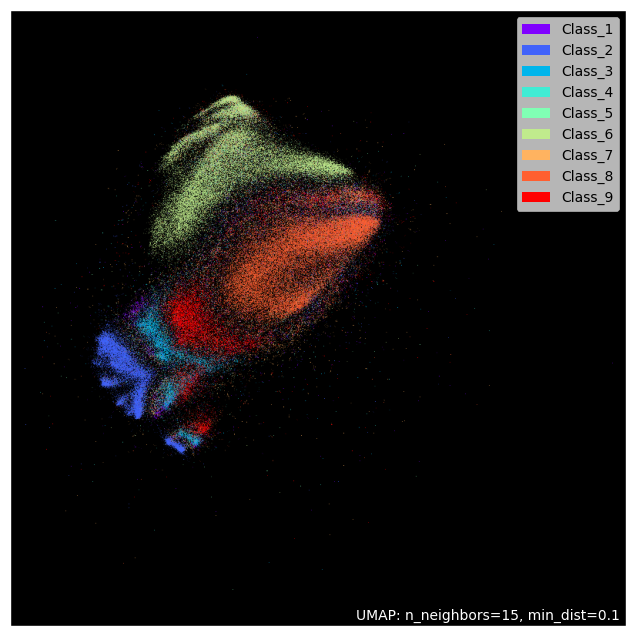

In [22]:
import umap.plot  # pip install umap-learn[plot]
umap.plot.points(umap_david, labels=y, theme="fire")

Temas disponibles

- fire
- viridis
- inferno
- blue
- red
- green
- darkblue
- darkred
- darkgreen

<Axes: >

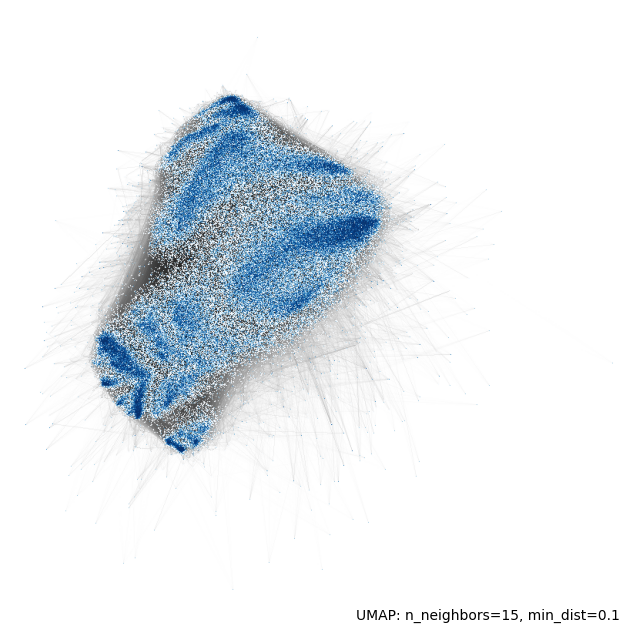

In [23]:
umap.plot.connectivity(umap_david, show_points=True)

In [ ]:
umap.plot.connectivity(umap_david, edge_bundling='hammer')